# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Brightspace.

Your code and analysis is like a story that awaits to be read, make it a nice story please. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 12 March, 2021, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the Centers for Disease Control and Prevention (CDC: https://covid.cdc.gov/covid-data-tracker/). CDC is a USA health protection agency and is in charge of collecting data about the COVID-19 pandemic, and in particular, tracking cases, deaths, and trends of COVID-19 in the United States. CDC collects and makes public deidentified individual-case data on a daily basis, submitted using standardized case reporting forms. In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction. CDC collects demographic characteristics, exposure history, disease severity indicators and outcomes, clinical data, laboratory diagnostic test results, and comorbidities. It also includes information on whether the individual survived or not.

The dataset we work with is a sample of the public data released by CDC, where the outcome for the target feature death_yn is known (i.e., either 'yes' or 'no'):
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf

Each student will work with a different subset of the data. The CSV file is named using the format: **covid19-cdc-[your-student-number].csv**, e.g., **covid19-cdc-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number, available from this link: https://drive.google.com/drive/folders/1HiAbcwh7-JT3UXn5qfd4Xo89kfwXISJ9?usp=sharing. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40].



(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process.
    - Check how many rows and columns your CSV has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuos and which ones as categorical types). 
    - Drop duplicate rows and columns, if any.
    - Drop constant columns, if any.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings.
    - Save the initial discussion of your findings into a single data quality report PDF file.                     The PDF report should focus on the key issues identified in the data and discuss potential strategies              to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 
    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:
    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

# (0). Background for the given data analytics problem and dataset.

Please check the PDF report "Data_Quality_Report_and_Plan_Initial_Findings.pdf" for background and important terminology for this problem.


In [1]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import date
from matplotlib.backends.backend_pdf import PdfPages

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

TypeError: required field "type_ignores" missing from Module

In [2]:
# read in data from csv file to pandas dataframe.  
df = pd.read_csv('covid19-cdc-20200225.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

# (1). Prepare a data quality report for the CSV file.

### Check shape of CSV file

In [3]:
df.shape

(10000, 12)

We have a 10000 reported case with 12 features associated with each case.

### - Print the first and the last 5 rows.

In [4]:
df.head(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/10/29,NaN,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
1,2021/01/11,NaN,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"Multiple/Other, Non-Hispanic",No,Missing,No,Missing
2,2020/10/27,2020/10/27,2020/10/30,2020/10/27,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Unknown,No,Unknown
3,2020/07/09,NaN,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
4,2020/10/19,2021/01/14,NaN,2020/10/19,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing


In [5]:
df.tail(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2020/06/22,2021/01/24,2020/06/22,NaN,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Missing,Missing,No,Missing
9996,2020/05/24,2020/05/29,NaN,2020/05/24,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,No,Missing,No,Missing
9997,2020/05/07,2020/05/07,NaN,2020/05/07,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing
9998,2021/01/05,NaN,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,No,Missing,No,Missing
9999,2020/05/12,2020/05/22,NaN,2020/05/12,Laboratory-confirmed case,Male,50 - 59 Years,Hispanic/Latino,No,Missing,No,Missing


### Convert features to appropriate datatypes (e.g. decide which features are continuous or categorical types

In [6]:
df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

Based on examining the data in a spreadsheet program, all of the features are categorical.

- *cdc_case_earliest_dt* will be converted to **categorical** after converting by months from 1 - 12(each representing a differnt month, thus a separate category) because it data type will be converted to datetime64 i.e. numerical value. In this problem set, it makes sense to count the feature values (months, days, years) instead of compute the mean and deviations. 

- *cdc_report_dt* will be converted to **categorical** after converting by months from 1 - 12(each representing a differnt month, thus a separate category) because because it data type will be converted to datetime64 i.e. numerical value. In this problem set, it makes sense to count the feature values (months, days, years) instead of compute the mean and deviations. 

- *pos_spec_dt* will be converted to **categorical** after converting by months from 1 - 12(each representing a differnt month, thus a separate category) because because it data type will be converted to datetime64 i.e. numerical value. In this problem set, it makes sense to count the feature values (months, days, years) instead of compute the mean and deviations.  

- *onset_dt* will be converted to **categorical** after converting by months from 1 - 12(each representing a differnt month, thus a separate category) because because it data type will be converted to datetime64 i.e. numerical value. In this problem set, it makes sense to count the feature values (months, days, years) instead of compute the mean and deviations.  

- *hosp_yn* *icu_yn* *death_yn* *medcond_yn* *sex* *current_status* *race_ethnicity_combined* *age_group* will be converted to **categorical** because it contains finite set of possible values, each representing different meaning.


### Check for duplicate row/columns

In [7]:
#Select columns containing categorical data
categorical_columns = df[['current_status','sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','death_yn','medcond_yn']].columns
datetime_columns = df[['cdc_case_earliest_dt','cdc_report_dt','pos_spec_dt','onset_dt']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category') 

#Convert data type to datetime64 for these columns
for column in datetime_columns:
    df[column] = df[column].astype('datetime64')




In [8]:
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

In [9]:
# # for column in continuous_columns:
# df['year'] = df['cdc_case_earliest_dt'].dt.year
df.select_dtypes(include=['datetime64']).describe().T

,count,unique,top,freq,first,last
cdc_case_earliest_dt,10000,322,2020-12-14,112,2020-02-17,2021-01-16
cdc_report_dt,7671,325,2020-06-10,132,2020-02-17,2021-01-29
pos_spec_dt,2800,314,2021-01-04,34,2020-03-11,2021-01-25
onset_dt,5074,322,2020-11-30,50,2020-02-17,2021-01-16


In [10]:
df[df.duplicated()]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
497,2021-01-09,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing
831,2020-07-08,2020-07-08,NaT,2020-07-08,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
834,2020-11-24,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing
1193,2021-01-07,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
1255,2020-12-02,NaT,NaT,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Missing,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2020-12-14,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9933,2020-12-17,NaT,NaT,NaT,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,No,Missing,No,Missing
9959,2020-12-18,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9984,2021-01-08,NaT,NaT,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Unknown,Missing,No,Missing


In [11]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
# My approach is to keep the first row
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  496
Number of duplicate rows (including first) in the table is: 874


In [12]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


#### Result - Duplicate rows exist

- Rows 
    - There is no primary key in the dataset (id or patient number attribute) to check if a user is included twice. Therefore I compare against all columns attributes. This acts like a primary key. This initially returned 496 duplicate rows. To also include the rows that were matched I include "keep=False" parameter. Displaying these rows in a dataframe I see they include the value *NaT* for all attributes. This is a special value meaning "missing" information. These rows can be safely dropped as they add no information.

- Columns 
    - There are no duplicate columns. We will also check the descriptive stats to make sure we did not miss any duplicated columns.
    - From the CDC Documentation, the column of * cdc_report_dt* namely Initial case report date to CDC. mentioned the column is *deprecated, use new cdc_case_earliest_dt*. This column will be dropped too as invalid. 

In [13]:
# Show duplicate row data that can be dropped
df[df.duplicated()].head(10)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
497,2021-01-09,NaT,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing
831,2020-07-08,2020-07-08,NaT,2020-07-08,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
834,2020-11-24,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing
1193,2021-01-07,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
1255,2020-12-02,NaT,NaT,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Missing,Missing,No,Missing
1259,2020-12-18,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing
1304,2020-11-27,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
1350,2021-01-02,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
1395,2021-01-08,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
1470,2020-12-28,2020-12-28,2020-12-28,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,Unknown,No,Unknown


### Drop the duplicate features (rows and columns)

In [14]:
df = df.drop_duplicates()
# get duplicated row data. Use "keep=False" to mark all duplicates as true
print('Duplicate remaining rows:', df[df.duplicated(keep=False)].shape[0])

Duplicate remaining rows: 0


In [15]:
print('After dropping, number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

After dropping, number of duplicate rows (including first) in the table is: 0


In [16]:
df = df.drop(columns=['cdc_report_dt'])

In [17]:
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

### Check for constant columns for categorical column

In [18]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,9504,2,Laboratory-confirmed case,8858
sex,9504,4,Female,5046
age_group,9504,10,20 - 29 Years,1778
race_ethnicity_combined,9504,9,Unknown,3653
hosp_yn,9504,5,No,5220
icu_yn,9504,4,Missing,7157
death_yn,9504,2,No,9165
medcond_yn,9504,4,Missing,7011


### Check for columns for datetime 

In [19]:
# df.select_dtypes(include=['datetime64']).describe(datetime_is_numeric=True).T

In [20]:
df.select_dtypes(include=['datetime64']).describe().T

,count,unique,top,freq,first,last
cdc_case_earliest_dt,9504,322,2020-12-28,98,2020-02-17,2021-01-16
pos_spec_dt,2770,314,2020-12-14,32,2020-03-11,2021-01-25
onset_dt,5019,322,2020-11-30,48,2020-02-17,2021-01-16


In [21]:
datetime_columns = df[['cdc_case_earliest_dt','pos_spec_dt','onset_dt']].columns

for col in datetime_columns:
    df[col] = pd.DatetimeIndex(df[col]).month
#     df[col] = df[col].astype('int64')
    df[col] = df[col].astype('category')



### Combine datatime column with category column by grouping each column by month 

### Break down datetime into month

- cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt, all four coulmns show that it start at Feburary/ March and ends at Janurary. which last a year from 2020 to 2021. In order to further investigate the distribution of data with a year. Therefore, in this case, datetime will break down into month to examine the changes on that. 

In [22]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(include=['category']).describe().T

,count,unique,top,freq
cdc_case_earliest_dt,9504,12,12,2177
pos_spec_dt,2770,11,11,483
onset_dt,5019,12,11,997
current_status,9504,2,Laboratory-confirmed case,8858
sex,9504,4,Female,5046
age_group,9504,10,20 - 29 Years,1778
race_ethnicity_combined,9504,9,Unknown,3653
hosp_yn,9504,5,No,5220
icu_yn,9504,4,Missing,7157
death_yn,9504,2,No,9165


**Categorical Data** - Reviewing the categorical data below we can see all unique values > 1, meaning no constant columns in categorical feature

- *cdc_case_earliest_dt* has 12 unique value
- *pos_spec_dt* has 11 unqiue value
- *onset_dt* has 12 unqiue value
- *current_status* has 2 unique values
- *sex* has 4 unique values
- *age_group* has 10 unique values
- *race_ethnicity_combined* has 9 unique values
- *hosp_yn* has 5 unique values
- *icu_yn* has 4 unique values
- *death_yn* has 2 unique values
- *medcond_yn* has 4 unique values

### Check for Null Values 

In [23]:
#Missing data all features
df.isnull().sum()

cdc_case_earliest_dt          0
pos_spec_dt                6734
onset_dt                   4485
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
dtype: int64

**Result** - null values are found in two columns directly in the spreadsheet. 
There are 6734 and 4485 null values in column of ***pos_spec_dt*** and ***onset_dt*** 
- Other than that, we have to examine the if Null values are coded differently in this dataset. It could be that data is missing but it was not coded as Null in the original dataset.

In [24]:
df[datetime_columns]

,cdc_case_earliest_dt,pos_spec_dt,onset_dt
0,10,NaN,NaN
1,1,NaN,NaN
2,10,10.0,10.0
3,7,NaN,NaN
4,10,NaN,10.0
...,...,...,...
9995,6,6.0,NaN
9996,5,NaN,5.0
9997,5,NaN,5.0
9998,1,NaN,NaN


In [25]:
# Prepare %missing column
datetime_columns_missing  = 100 * (df[datetime_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_datetime_columns = pd.DataFrame(datetime_columns_missing, columns=['%missing'])
df_datetime_columns

,%missing
cdc_case_earliest_dt,0.000000
pos_spec_dt,70.854377
onset_dt,47.190657


### Result 
*onset_dt* *onset_dt* have around 70% and 47% missing value, meaning majority of data in resspective column is missing. Further examinsation needed. 

### Check for value that is missing but has coded differently in spreadsheet

In [26]:
# Look at the values taken by each categorical feature, including the NaN values.
for column in categorical_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


current_status
Laboratory-confirmed case    8858
Probable Case                 646
Name: current_status, dtype: int64

sex
Female     5046
Male       4377
Unknown      66
Missing      15
Name: sex, dtype: int64

age_group
20 - 29 Years    1778
30 - 39 Years    1489
40 - 49 Years    1378
50 - 59 Years    1290
60 - 69 Years    1023
10 - 19 Years    1015
70 - 79 Years     568
80+ Years         497
0 - 9 Years       453
Missing            13
Name: age_group, dtype: int64

race_ethnicity_combined
Unknown                                                 3653
White, Non-Hispanic                                     3290
Hispanic/Latino                                          975
Black, Non-Hispanic                                      698
Multiple/Other, Non-Hispanic                             490
Asian, Non-Hispanic                                      229
Missing                                                   88
American Indian/Alaska Native, Non-Hispanic               61
Native Hawaiia

<!-- - 'Missing' value in the columns above delievered the same meaning as NaN. So will convert value with 'Missing'' with NaN for consistency.  -->

In [27]:
for column in categorical_columns:
    df[column] = df[column].replace('Missing',np.nan)


In [28]:
# Prepare %missing column
categorical_columns_missing  = 100 * (df[categorical_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_categorical_columns = pd.DataFrame(categorical_columns_missing, columns=['%missing'])
df_categorical_columns

,%missing
current_status,0.000000
sex,0.157828
age_group,0.136785
race_ethnicity_combined,0.925926
hosp_yn,21.864478
icu_yn,75.305135
death_yn,0.000000
medcond_yn,73.768939


### - Save your updated/cleaned data frame to a new csv file.

In [29]:
# Write the dataframe to a csv file
df.to_csv('covid19_cdc_cleaned.csv', index = False)

### - Prepare a table with descriptive statistics for all the categorical features.

Of the categorical features, we already know:
- The type of data for each

We now supplement this information with the following
- Feature cardinality

In [30]:
# Look at the values taken by each categorical feature, excluding the NaN values.
for column in categorical_columns:
    print("\n" + column)
    print(df[column].value_counts())


current_status
Laboratory-confirmed case    8858
Probable Case                 646
Name: current_status, dtype: int64

sex
Female     5046
Male       4377
Unknown      66
Name: sex, dtype: int64

age_group
20 - 29 Years    1778
30 - 39 Years    1489
40 - 49 Years    1378
50 - 59 Years    1290
60 - 69 Years    1023
10 - 19 Years    1015
70 - 79 Years     568
80+ Years         497
0 - 9 Years       453
Name: age_group, dtype: int64

race_ethnicity_combined
Unknown                                                 3653
White, Non-Hispanic                                     3290
Hispanic/Latino                                          975
Black, Non-Hispanic                                      698
Multiple/Other, Non-Hispanic                             490
Asian, Non-Hispanic                                      229
American Indian/Alaska Native, Non-Hispanic               61
Native Hawaiian/Other Pacific Islander, Non-Hispanic      20
Name: race_ethnicity_combined, dtype: int64

hosp_yn

In [31]:
# Look at the values taken by each categorical feature, as a proportion
for column in categorical_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True))


current_status
Laboratory-confirmed case    0.932029
Probable Case                0.067971
Name: current_status, dtype: float64

sex
Female     0.531774
Male       0.461271
Unknown    0.006955
Name: sex, dtype: float64

age_group
20 - 29 Years    0.187335
30 - 39 Years    0.156885
40 - 49 Years    0.145190
50 - 59 Years    0.135918
60 - 69 Years    0.107786
10 - 19 Years    0.106943
70 - 79 Years    0.059846
80+ Years        0.052365
0 - 9 Years      0.047729
Name: age_group, dtype: float64

race_ethnicity_combined
Unknown                                                 0.387957
White, Non-Hispanic                                     0.349405
Hispanic/Latino                                         0.103547
Black, Non-Hispanic                                     0.074129
Multiple/Other, Non-Hispanic                            0.052039
Asian, Non-Hispanic                                     0.024320
American Indian/Alaska Native, Non-Hispanic             0.006478
Native Hawaiian/Other P

In [32]:
# store the 2ndmode and 2ndmode % values in a new dataframe
df_category_mode = pd.DataFrame(index = categorical_columns, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
current_status,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN
age_group,NaN,NaN,NaN,NaN,NaN,NaN
race_ethnicity_combined,NaN,NaN,NaN,NaN,NaN,NaN
hosp_yn,NaN,NaN,NaN,NaN,NaN,NaN
icu_yn,NaN,NaN,NaN,NaN,NaN,NaN
death_yn,NaN,NaN,NaN,NaN,NaN,NaN
medcond_yn,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Look at the values taken by each categorical feature
for column in categorical_columns:
    print("\n" + column)
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'


current_status
Laboratory-confirmed case    8858
Probable Case                 646
Name: current_status, dtype: int64
CategoricalIndex(['Laboratory-confirmed case', 'Probable Case'], categories=['Laboratory-confirmed case', 'Probable Case'], ordered=False, dtype='category')

sex
Female     5046
Male       4377
Unknown      66
Name: sex, dtype: int64
CategoricalIndex(['Female', 'Male', 'Unknown'], categories=['Female', 'Male', 'Unknown'], ordered=False, dtype='category')

age_group
20 - 29 Years    1778
30 - 39 Years    1489
40 - 49 Years    1378
50 - 59 Years    1290
60 - 69 Years    1023
10 - 19 Years    1015
70 - 79 Years     568
80+ Years         497
0 - 9 Years       453
Name: age_group, dtype: int64
CategoricalIndex(['20 - 29 Years', '30 - 39 Years', '40 - 49 Years',
                  '50 - 59 Years', '60 - 69 Years', '10 - 19 Years',
                  '70 - 79 Years', '80+ Years', '0 - 9 Years'],
                 categories=['0 - 9 Years', '10 - 19 Years', '20 - 29 Years', '30 -

In [34]:
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
current_status,Laboratory-confirmed case,8858,0.932029,Probable Case,646,0.0679714
sex,Female,5046,0.531774,Male,4377,0.461271
age_group,20 - 29 Years,1778,0.187335,30 - 39 Years,1489,0.156885
race_ethnicity_combined,Unknown,3653,0.387957,"White, Non-Hispanic",3290,0.349405
hosp_yn,No,5220,0.702936,Unknown,1536,0.206841
icu_yn,Unknown,1297,0.55262,No,968,0.412441
death_yn,No,9165,0.964331,Yes,339,0.0356692
medcond_yn,No,953,0.38227,Yes,820,0.328921


In [35]:
#should wait after initial data 
for column in categorical_columns:
    df[column] = df[column].replace('Missing',np.nan)

In [36]:
# Prepare %missing column
df_columns_missing  = 100 * (df.isnull().sum()/df.shape[0])
# store the values in a dataframe
df_columns = pd.DataFrame(df_columns_missing, columns=['%missing'])
df_columns

,%missing
cdc_case_earliest_dt,0.000000
pos_spec_dt,70.854377
onset_dt,47.190657
current_status,0.000000
sex,0.157828
age_group,0.136785
race_ethnicity_combined,0.925926
hosp_yn,21.864478
icu_yn,75.305135
death_yn,0.000000


In [37]:
# A way to get the number of unique values for all features
df.nunique()

cdc_case_earliest_dt       12
pos_spec_dt                11
onset_dt                   12
current_status              2
sex                         3
age_group                   9
race_ethnicity_combined     8
hosp_yn                     4
icu_yn                      3
death_yn                    2
medcond_yn                  3
dtype: int64

### Check for Irregular cardinalities & permitted values

In [38]:

# Check for irregular cardinality & permitted values in categorical features. 
print("Unique values for:\ncdc_case_earliest_dt:", pd.unique(df["cdc_case_earliest_dt"].ravel()))
print("pos_spec_dt:", pd.unique(df["pos_spec_dt"].ravel()))
print("onset_dt:", pd.unique(df["onset_dt"].ravel()))

print("current_status:", pd.unique(df["current_status"].ravel()))
print("sex:", pd.unique(df["sex"].ravel()))
print("age_group:", pd.unique(df["age_group"].ravel()))
print("race_ethnicity_combined:", pd.unique(df["race_ethnicity_combined"].ravel()))
print("hosp_yn:", pd.unique(df["hosp_yn"].ravel()))
print("icu_yn:", pd.unique(df["icu_yn"].ravel()))
print("death_yn:", pd.unique(df["death_yn"].ravel()))
print("medcond_yn:", pd.unique(df["medcond_yn"].ravel()))

Unique values for:
cdc_case_earliest_dt: [10, 1, 7, 8, 9, ..., 5, 4, 11, 6, 2]
Length: 12
Categories (12, int64): [10, 1, 7, 8, ..., 4, 11, 6, 2]
pos_spec_dt: [NaN, 10.0, 8.0, 9.0, 3.0, ..., 11.0, 1.0, 6.0, 7.0, 4.0]
Length: 12
Categories (11, float64): [10.0, 8.0, 9.0, 3.0, ..., 1.0, 6.0, 7.0, 4.0]
onset_dt: [NaN, 10.0, 9.0, 12.0, 3.0, ..., 7.0, 8.0, 5.0, 6.0, 2.0]
Length: 13
Categories (12, float64): [10.0, 9.0, 12.0, 3.0, ..., 8.0, 5.0, 6.0, 2.0]
current_status: [Laboratory-confirmed case, Probable Case]
Categories (2, object): [Laboratory-confirmed case, Probable Case]
sex: [Male, Female, Unknown, NaN]
Categories (3, object): [Male, Female, Unknown]
age_group: [20 - 29 Years, 0 - 9 Years, 30 - 39 Years, 50 - 59 Years, 70 - 79 Years, 10 - 19 Years, 60 - 69 Years, 40 - 49 Years, 80+ Years, NaN]
Categories (9, object): [20 - 29 Years, 0 - 9 Years, 30 - 39 Years, 50 - 59 Years, ..., 10 - 19 Years, 60 - 69 Years, 40 - 49 Years, 80+ Years]
race_ethnicity_combined: [Unknown, Multiple/Othe

Regular Cardinalities found for columns **sex, race_ethnicity_combined, hosp_yn, icu_yn & medcond_yn** . The values that appear seem to be in the permitted range.


### Check for exact unknown values

In [39]:
df['sex'].value_counts()

Female     5046
Male       4377
Unknown      66
Name: sex, dtype: int64

In [40]:
df['race_ethnicity_combined'].value_counts()

Unknown                                                 3653
White, Non-Hispanic                                     3290
Hispanic/Latino                                          975
Black, Non-Hispanic                                      698
Multiple/Other, Non-Hispanic                             490
Asian, Non-Hispanic                                      229
American Indian/Alaska Native, Non-Hispanic               61
Native Hawaiian/Other Pacific Islander, Non-Hispanic      20
Name: race_ethnicity_combined, dtype: int64

In [41]:
df['hosp_yn'].value_counts()

No         5220
Unknown    1536
Yes         669
OTH           1
Name: hosp_yn, dtype: int64

In [42]:
df['icu_yn'].value_counts()

Unknown    1297
No          968
Yes          82
Name: icu_yn, dtype: int64

In [43]:
df['medcond_yn'].value_counts()

No         953
Yes        820
Unknown    720
Name: medcond_yn, dtype: int64

In [44]:
df.dtypes

cdc_case_earliest_dt       category
pos_spec_dt                category
onset_dt                   category
current_status             category
sex                        category
age_group                  category
race_ethnicity_combined    category
hosp_yn                    category
icu_yn                     category
death_yn                   category
medcond_yn                 category
dtype: object

### Check logical integrity of data 
A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

- Test 1 check if any patient who have not hospitalized but have admitted to ICU (impossible)
Patient hospitalized 
Patient admitted to ICU 

In [45]:
test_1 = df[['hosp_yn','icu_yn']][df['hosp_yn']=='No'][df["icu_yn"] == 'Yes']
print("Number of rows failing the test: ", test_1.shape[0])
test_1.head(20)

Number of rows failing the test:  0


,hosp_yn,icu_yn


- Test 2 check if any patient who have not hospitalized but have admitted to ICU (impossible) Patient hospitalized Patient admitted to ICU

In [46]:
test_2 = df[['hosp_yn','icu_yn']][df['hosp_yn'].isnull()][df["icu_yn"] == 'No']
print("Number of rows failing the test: ", test_2.shape[0])
test_2.head(20)

Number of rows failing the test:  5


,hosp_yn,icu_yn
914,NaN,No
1637,NaN,No
1874,NaN,No
2735,NaN,No
5890,NaN,No


In [47]:
test_3 = df[['hosp_yn','icu_yn']][df['hosp_yn'].isnull()][df["icu_yn"] == 'Yes']
print("Number of rows failing the test: ", test_3.shape[0])
test_3.head(20)

Number of rows failing the test:  0


,hosp_yn,icu_yn


In [48]:
test_4 = df[['death_yn','onset_dt']][df['death_yn']=='Yes'][df["onset_dt"].isnull()]
print("Number of rows failing the test: ", test_4.shape[0])
test_4.head(20)

Number of rows failing the test:  200


,death_yn,onset_dt
22,Yes,NaN
92,Yes,NaN
124,Yes,NaN
160,Yes,NaN
265,Yes,NaN
296,Yes,NaN
333,Yes,NaN
339,Yes,NaN
355,Yes,NaN
358,Yes,NaN


- Test 5

In [49]:
test_5 = df[['death_yn','pos_spec_dt']][df['death_yn']=='Yes'][df['pos_spec_dt'].isnull()]
print("Number of rows failing the test: ", test_5.shape[0])
test_5.head(83)

Number of rows failing the test:  226


,death_yn,pos_spec_dt
20,Yes,NaN
22,Yes,NaN
65,Yes,NaN
92,Yes,NaN
124,Yes,NaN
...,...,...
3922,Yes,NaN
4029,Yes,NaN
4033,Yes,NaN
4102,Yes,NaN


- Test 6

In [50]:
test_6 = df[['hosp_yn','icu_yn']][df['hosp_yn'] == 'No'][df["icu_yn"].isnull()]
print("Number of rows failing the test: ", test_6.shape[0])
test_6.head(20)

Number of rows failing the test:  3743


,hosp_yn,icu_yn
1,No,NaN
4,No,NaN
8,No,NaN
21,No,NaN
22,No,NaN
34,No,NaN
35,No,NaN
43,No,NaN
44,No,NaN
49,No,NaN


### - Plot bar plots individual sheet for all the categorical features.


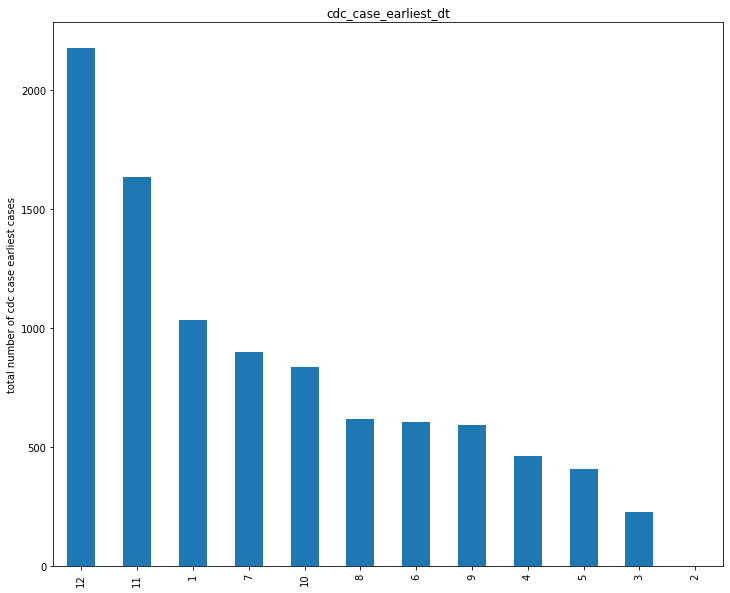

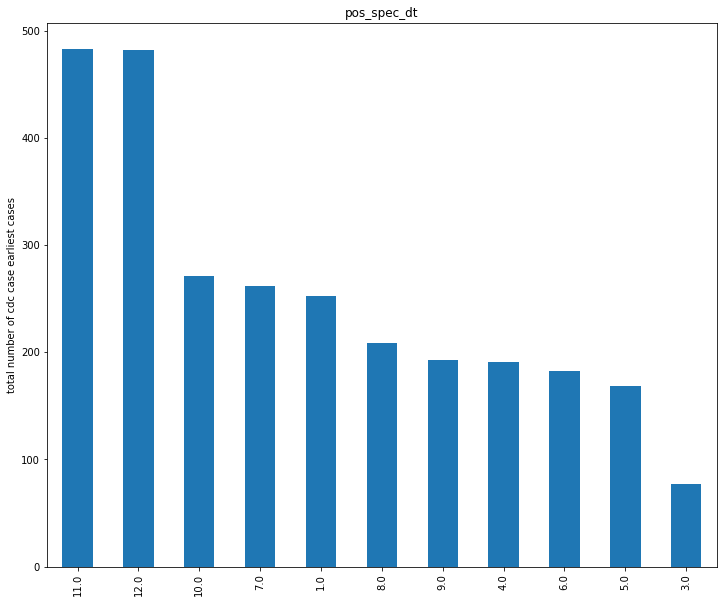

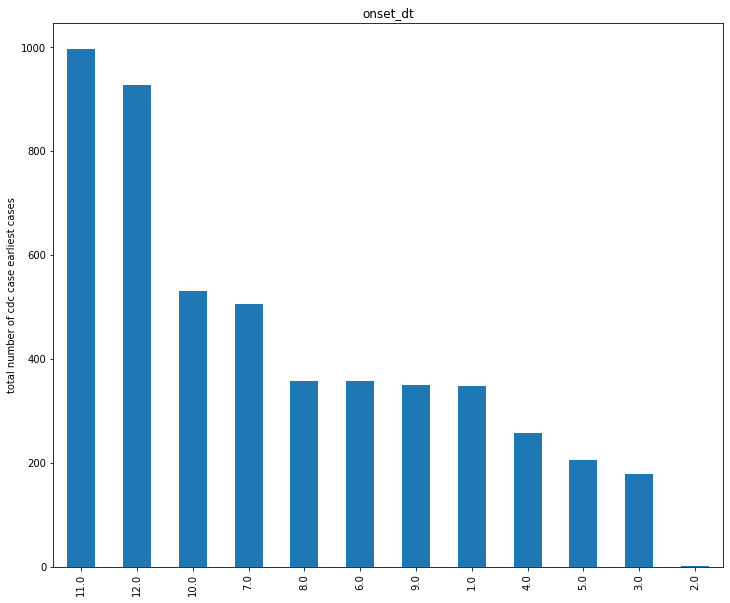

In [51]:
# Plot bar plots for all the catagorical features and save them in a single PDF file
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    for col in datetime_columns:
        f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
        plt.title(col)
        plt.ylabel('total number of cdc case earliest cases')
        pp.savefig(f.get_figure())
        plt.show()

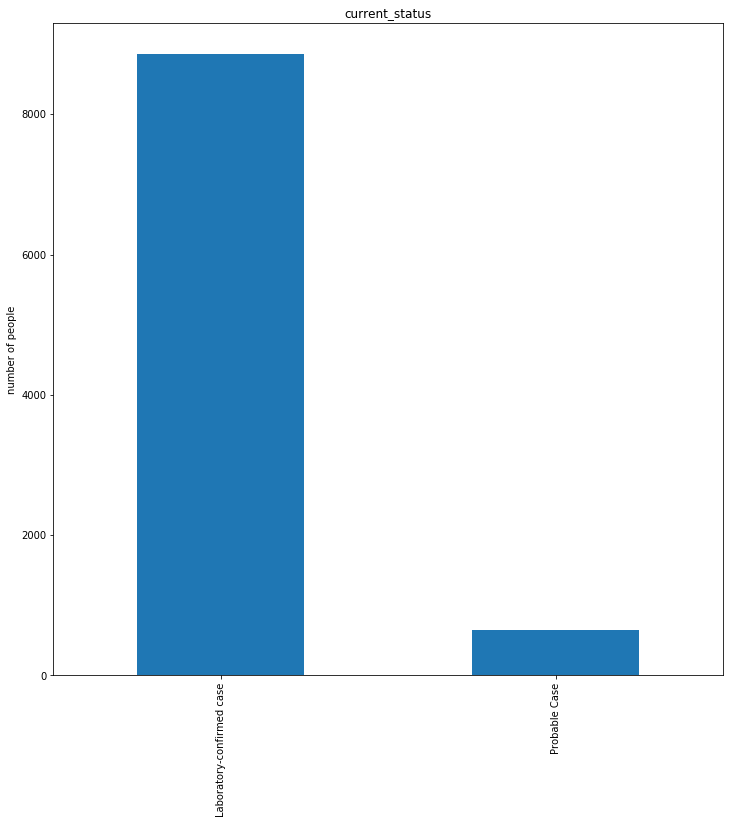

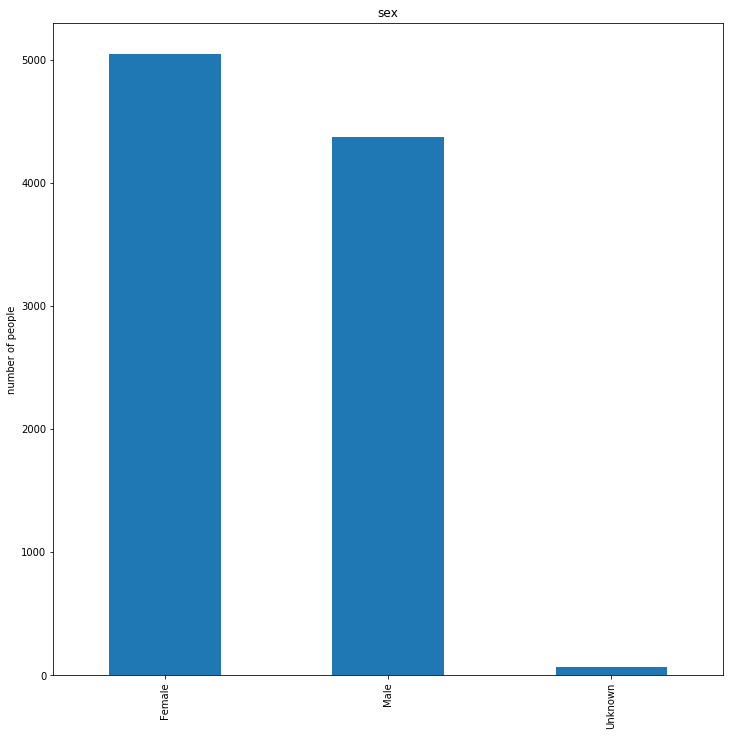

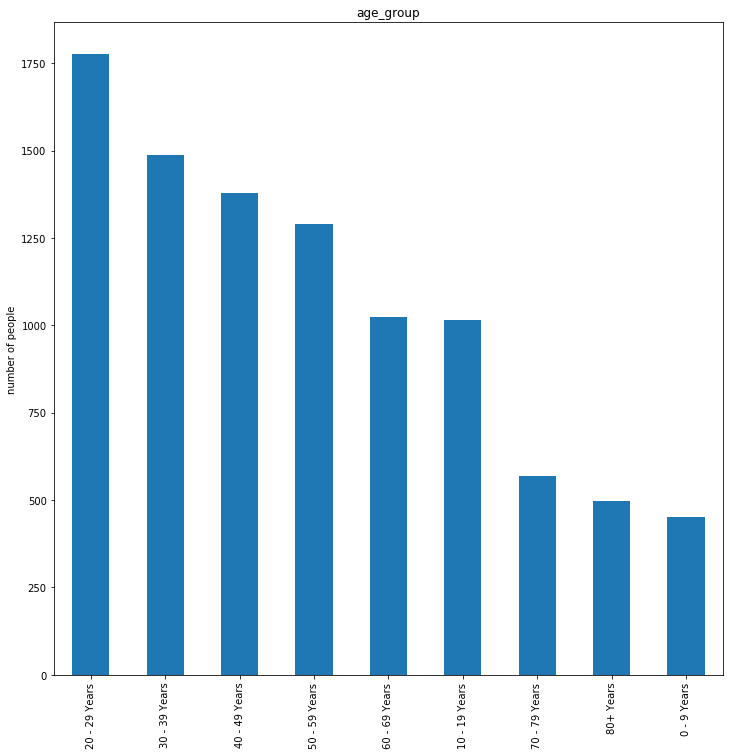

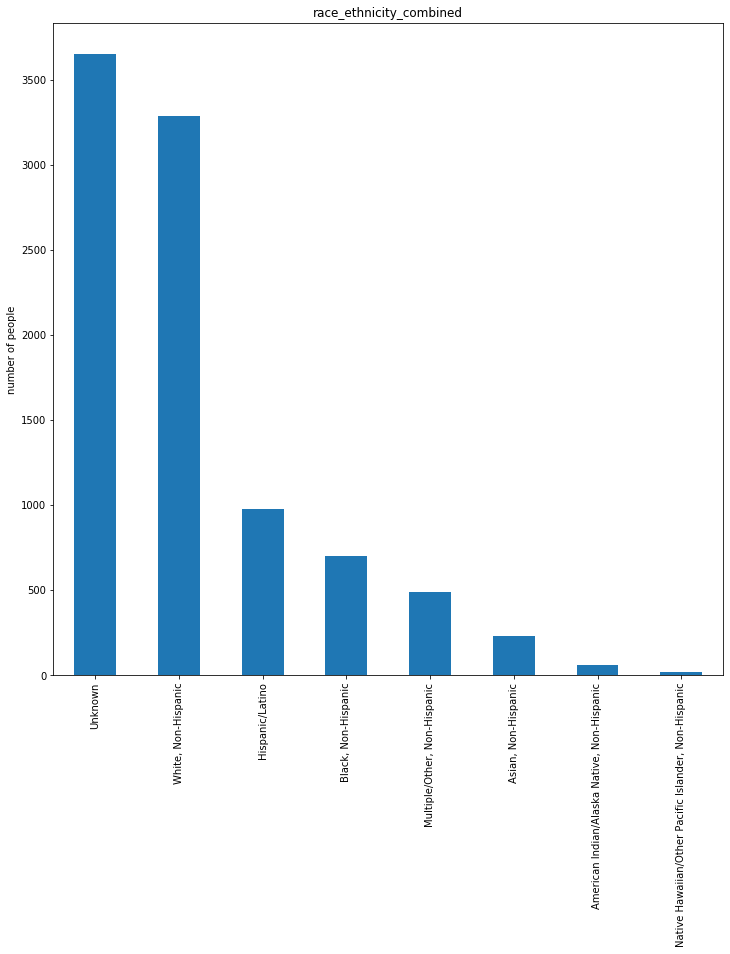

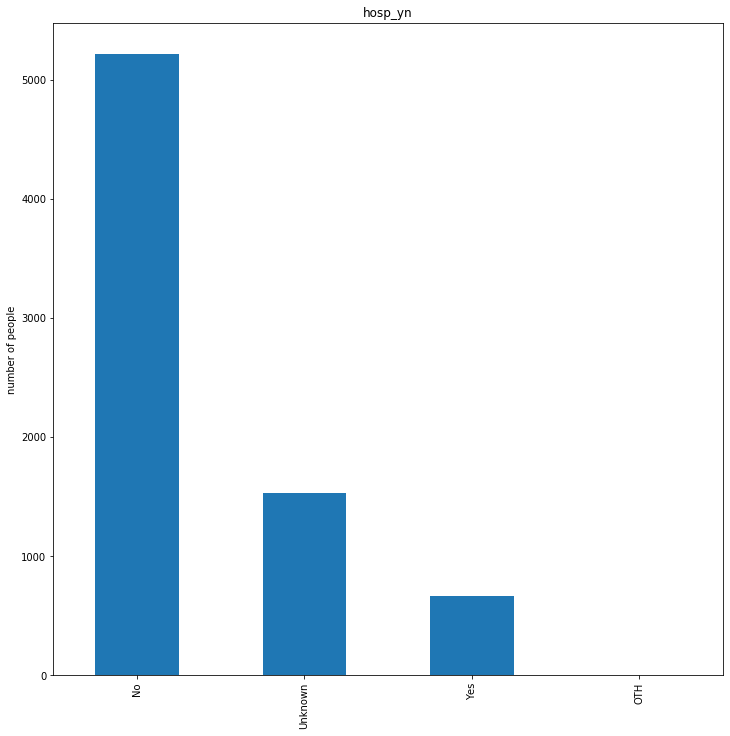

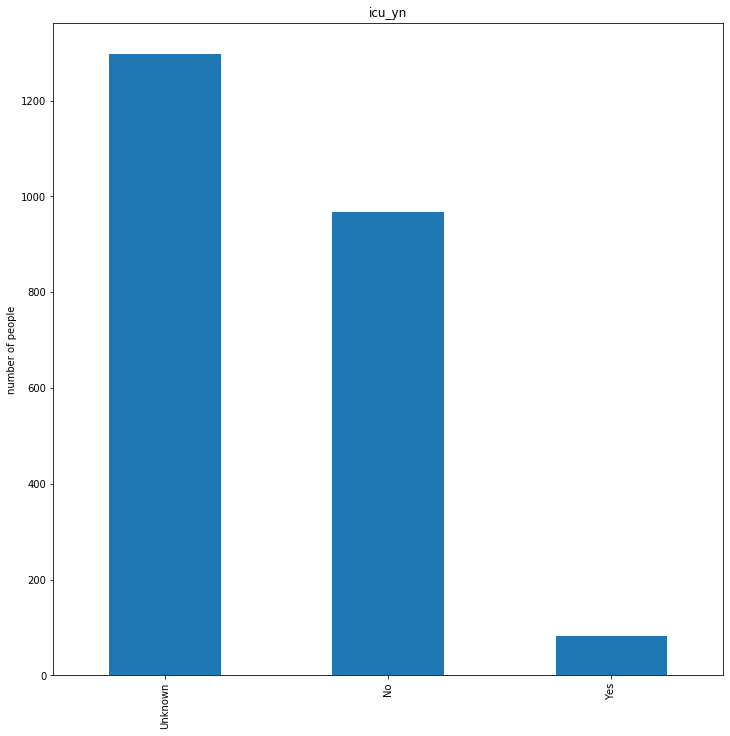

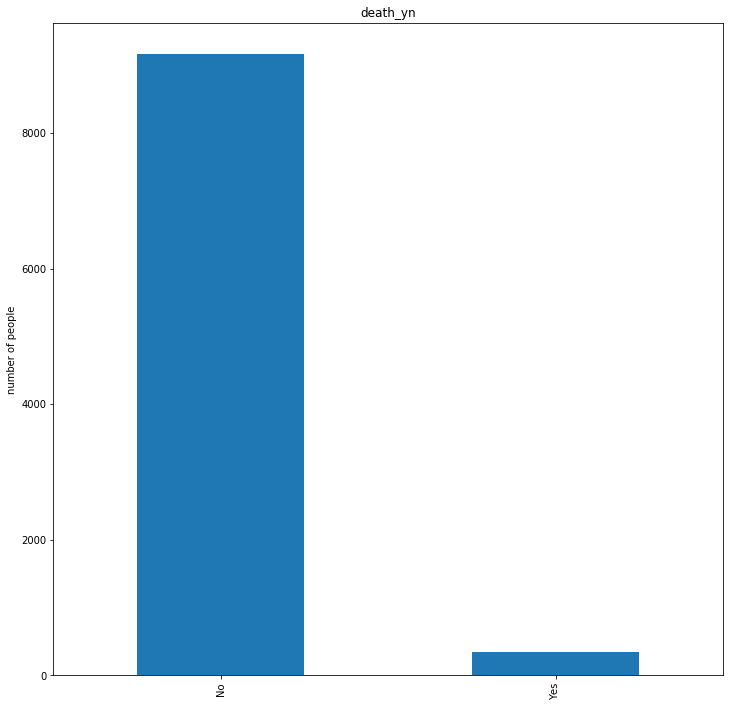

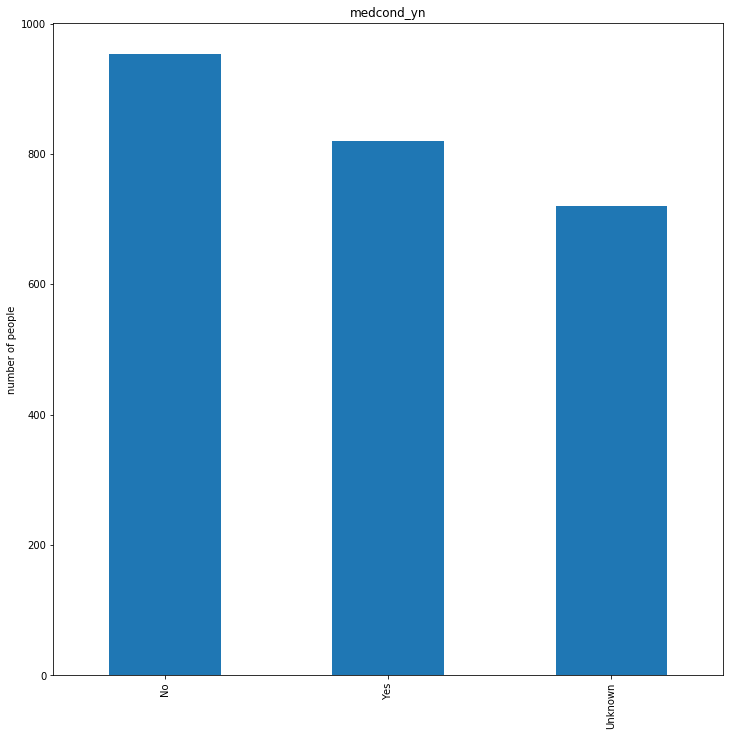

In [52]:
with PdfPages('categorical_barplots_1-2.pdf') as pp:
    for col in categorical_columns:
        f = df[col].value_counts().plot(kind='bar', figsize=(12,12))
        plt.title(col)
        plt.ylabel('number of people')
        pp.savefig(f.get_figure())
        plt.show()

# (2) Prepare a data quality plan for the cleaned CSV file. 

### - Mark down all the features where there are potential problems or data quality issues.

The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**, plus some issues with object type of features:

**large missing value** 

- sex has missing value for 15.

- age_group has missing value for 13

- pos_spec_dt has a large missing percentage 70.854377%, null value count for 6734 out of 9504

- onset_dt has a large missing percentage 47.190657%, null value count for 4485 out of 9504

- hosp_yn has a large missing percentage 21.864478%, null value count for 2078 out of 9504

- icu_yn has a large missing percentage 75.305135%, null value count for 7157 out of 9504

- medcond_yn has a large missing percentage 73.768939%, null value count for 7011 out of 9504

**unknown value**
- sex is Unknown for 66

- race_ethnicity_combined is Unknown for 3653

- hosp_yn is unknown for 1536

- icu_yn is inknown for 1297

- medcond_yn is unknown for 720




## Data Understanding: Data Quality Plan
In this section we list all features and the observations and actions involving those features, as a step towards obtaining a cleaner dataset.

### Propose solutions to deal with the problems identified. Explain why did you choose one solution over potentially many other.


**sex has missing value for 15**

Investigation should be made to try deriving a missing indicator feature from features with missing values.

***age_group has missing value for 13***

Investigation should be made to try deriving a missing indicator feature from features with missing values.

***pos_spec_dt has a large missing percentage 70.854377%, null value count for 6734 out of 9504***

As around 71% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.

***onset_dt has a large missing percentage 47.190657%, null value count for 4485 out of 9504***

As around 47% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.

***hosp_yn has a large missing percentage 21.864478%, null value count for 2078 out of 9504***

As around 22% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.

***icu_yn has a large missing percentage 75.305135%, null value count for 7157 out of 9504***

As around 75% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.

***medcond_yn has a large missing percentage 73.768939%, null value count for 7011 out of 9504***

As around 74% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.

***sex is Unknown for 66***
Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.

***race_ethnicity_combined is Unknown for 3653***
Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.

***hosp_yn is Unknown for 1536***
Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.

***icu_yn is Unknown for 1297***
Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.

***medcond_yn is Unknown for 720***
Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.


### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

In [53]:
# Keep a copy of the original data
df_raw = df.copy()

### "Sex" has missing value for 15 
Investigation should be made to try deriving a missing indicator feature from features with missing values.

In [54]:
#Have a overall look of the rows with unknown sex 
df[df['sex'].isnull()]

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
2274,10,NaN,NaN,Probable Case,NaN,60 - 69 Years,Unknown,No,Unknown,No,NaN
2732,11,NaN,NaN,Laboratory-confirmed case,NaN,50 - 59 Years,Unknown,Unknown,Unknown,No,NaN
2864,11,NaN,NaN,Laboratory-confirmed case,NaN,0 - 9 Years,"Asian, Non-Hispanic",No,NaN,No,NaN
3476,5,5.0,NaN,Laboratory-confirmed case,NaN,80+ Years,NaN,NaN,NaN,No,NaN
4706,10,10.0,NaN,Probable Case,NaN,40 - 49 Years,Unknown,NaN,NaN,No,NaN
5394,9,NaN,9.0,Laboratory-confirmed case,NaN,50 - 59 Years,"White, Non-Hispanic",No,NaN,No,NaN
5961,12,12.0,NaN,Probable Case,NaN,10 - 19 Years,Unknown,Unknown,Unknown,No,Unknown
6335,7,7.0,NaN,Laboratory-confirmed case,NaN,70 - 79 Years,Unknown,NaN,NaN,No,NaN
6755,7,NaN,7.0,Probable Case,NaN,10 - 19 Years,Unknown,No,NaN,No,NaN
6858,9,NaN,NaN,Probable Case,NaN,40 - 49 Years,"White, Non-Hispanic",No,NaN,No,NaN


In [55]:
df[df['sex'].isnull()]['age_group'].value_counts()


50 - 59 Years    3
40 - 49 Years    3
70 - 79 Years    2
10 - 19 Years    2
0 - 9 Years      2
80+ Years        1
60 - 69 Years    1
30 - 39 Years    1
20 - 29 Years    0
Name: age_group, dtype: int64

In [56]:
df[df['sex'].isnull()]['icu_yn'].value_counts()

Unknown    6
Yes        0
No         0
Name: icu_yn, dtype: int64

In [57]:
df[df['sex'].isnull()]['race_ethnicity_combined'].value_counts()

Unknown                                                 9
White, Non-Hispanic                                     3
Multiple/Other, Non-Hispanic                            1
Asian, Non-Hispanic                                     1
Native Hawaiian/Other Pacific Islander, Non-Hispanic    0
Hispanic/Latino                                         0
Black, Non-Hispanic                                     0
American Indian/Alaska Native, Non-Hispanic             0
Name: race_ethnicity_combined, dtype: int64

In [58]:
df[df['sex'].isnull()]['cdc_case_earliest_dt'].value_counts()

11    3
7     3
12    2
10    2
9     2
5     1
4     1
1     1
8     0
6     0
3     0
2     0
Name: cdc_case_earliest_dt, dtype: int64

In [59]:
df[df['sex'].isnull()]['death_yn'].value_counts()

No     15
Yes     0
Name: death_yn, dtype: int64

Missing value in sex column spread across different age groups
However, looking at the above table, I found that for each row, missing data in sex column did tell much information in other columns in icu_yn, race_ethnicity_combined and death_yn .

- **Action**: Therefore, keep the data, No action needed.

### age_group has missing value for 13

In [60]:
df[df['age_group'].isnull()]

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
836,12,NaN,12.0,Probable Case,Female,NaN,"White, Non-Hispanic",No,NaN,No,NaN
1512,6,6.0,NaN,Laboratory-confirmed case,Male,NaN,Hispanic/Latino,NaN,NaN,No,NaN
2155,1,NaN,NaN,Laboratory-confirmed case,Male,NaN,Unknown,No,NaN,No,NaN
2196,6,NaN,6.0,Probable Case,Male,NaN,"Asian, Non-Hispanic",No,NaN,No,NaN
2909,12,NaN,NaN,Laboratory-confirmed case,Male,NaN,"American Indian/Alaska Native, Non-Hispanic",NaN,NaN,No,NaN
4479,11,NaN,11.0,Probable Case,Male,NaN,Unknown,No,NaN,No,NaN
4665,11,NaN,NaN,Probable Case,Female,NaN,Unknown,NaN,NaN,No,NaN
4925,11,NaN,11.0,Probable Case,Male,NaN,Unknown,No,NaN,No,NaN
5965,11,NaN,11.0,Probable Case,Male,NaN,Unknown,No,NaN,No,NaN
5970,10,NaN,10.0,Probable Case,Male,NaN,"White, Non-Hispanic",No,NaN,No,NaN


In [61]:
df[df['age_group'].isnull()]['current_status'].value_counts()

Probable Case                10
Laboratory-confirmed case     3
Name: current_status, dtype: int64

In [62]:
df['current_status'].value_counts()

Laboratory-confirmed case    8858
Probable Case                 646
Name: current_status, dtype: int64

** Based on above obersevation, missing value in age group tend to have more probablt case under current_status. 

**Action** 
- As probable case only have 646 in total, it is better to keep those data as to avoid dropping too much feature. 

### pos_spec_dt has a large missing percentage 70.854377%, null value count for 6734 out of 9504

As around 70% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.

We strive to avoid dropping any features if at all possible. Although the pos_spec_dt contains over 70% missing value, we believe the pos_spec_dt is crucial feature in doing the analysis. 

**Action** No action needed.

### onset_dt has a large missing percentage 47.190657%, null value count for 4485 out of 9504

As around 47% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.

We strive to avoid dropping any features if at all possible. Although the onset_dt contains over 70% missing value, we believe the pos_spec_dt is crucial feature in doing the analysis. 

**Action** No action needed.

### hosp_yn has a large missing percentage 21.864478%, null value count for 2078 out of 9504

As around 22% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.

We strive to avoid dropping any features if at all possible. Although the hosp_yn contains over 22% missing value, we believe the hosp_yn is crucial feature in doing the analysis.

**Action** 
- No action needed.

In [63]:
df[df['hosp_yn'].isnull()]['icu_yn'].isnull().value_counts()

True     2073
False       5
Name: icu_yn, dtype: int64

### icu_yn has a large missing percentage 75.305135%, null value count for 7157 out of 9504

As around 75% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.

In [64]:
df[df['hosp_yn'] == 'No']['icu_yn'].value_counts(dropna=False)

NaN        3743
No          817
Unknown     660
Yes           0
Name: icu_yn, dtype: int64

In [65]:
df[df['hosp_yn'] == 'Unknown']['icu_yn'].value_counts(dropna=False)

NaN        1033
Unknown     496
No            7
Yes           0
Name: icu_yn, dtype: int64

In [66]:
df[df['hosp_yn'] == 'Unknown']['death_yn'].value_counts(dropna=False)

No     1493
Yes      43
Name: death_yn, dtype: int64

In [67]:
df['icu_yn'].value_counts(dropna=False)

NaN        7157
Unknown    1297
No          968
Yes          82
Name: icu_yn, dtype: int64

We strive to avoid dropping any features if at all possible. Although the icu_yn contains over 75% missing value, we believe the icu_yn is crucial feature in doing the analysis.

***hosp_yn*** with value "No" represented 3743 "Missing" value in colmun "icu_yn". 
- As cases reported didn't hospitalized also means that they didnt admit to ICU. 
So, 3743 Missing value will change to No

### ***medcond_yn has a large missing percentage 73.768939%, null value count for 7011 out of 9504***

As around 73% of values are missing, investigation should be made to try deriving a missing indicator feature from features with missing values.

In [68]:
df['medcond_yn'].value_counts(dropna=False)

NaN        7011
No          953
Yes         820
Unknown     720
Name: medcond_yn, dtype: int64

From the above, a lot of value is Missing value (NaN) and Unknown (720). The remaining data is not representing enough in this dataset. 

**Action**  decide to drop this feature

In [69]:
df = df.drop(['medcond_yn'], axis = 1)

In [70]:
df

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn
0,10,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,NaN,NaN,No
1,1,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"Multiple/Other, Non-Hispanic",No,NaN,No
2,10,10.0,10.0,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Unknown,No
3,7,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,NaN,NaN,No
4,10,NaN,10.0,Laboratory-confirmed case,Male,20 - 29 Years,"White, Non-Hispanic",No,NaN,No
...,...,...,...,...,...,...,...,...,...,...
9995,6,6.0,NaN,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,NaN,NaN,No
9996,5,NaN,5.0,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,No,NaN,No
9997,5,NaN,5.0,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,NaN,No
9998,1,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,No,NaN,No


### sex is Unknown for 66 
- Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.

rows with unknown sex type might mean non-binary. So I suggest to keep those row with unknown values.  

***Action***
-Do nothing

### race_ethnicity_combined is Unknown for 3653

Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.

In [71]:
df[df['race_ethnicity_combined'] == 'Unknown']['cdc_case_earliest_dt'].value_counts(dropna=False)

12    960
11    504
1     485
7     346
10    258
6     251
8     221
9     200
5     184
4     149
3      94
2       1
Name: cdc_case_earliest_dt, dtype: int64

In [72]:
df[df['race_ethnicity_combined'] == 'Unknown']['death_yn'].value_counts(dropna=False)

No     3588
Yes      65
Name: death_yn, dtype: int64

Although for the affected rows, race_thncity_combined is unknown, but since among those cases:

- all months of cdc_case_earliest_dt are covered 

**Action**
"Unknown" value will be treated as missing value as the data didnt tell much about the feature. Those affected rows will be kept as it tells important info about other features.

In [73]:
#Change to missing value 
df['race_ethnicity_combined'] = df['race_ethnicity_combined'].replace('Unknown',np.nan)

In [74]:
df[df['race_ethnicity_combined'] == 'Unknown']

,cdc_case_earliest_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn


### hosp_yn is Unknown for 1536 
Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.


In [75]:
df[df['hosp_yn'] == 'Unknown']['death_yn'].value_counts(dropna=False)

No     1493
Yes      43
Name: death_yn, dtype: int64

In [76]:
df[df['hosp_yn'] == 'Unknown']['cdc_case_earliest_dt'].value_counts(dropna=False)

12    511
1     274
11    183
7     115
6      88
10     84
5      71
4      68
8      62
9      52
3      27
2       1
Name: cdc_case_earliest_dt, dtype: int64

Although for the affected rows, hosp_yn is unknown, but since among those cases:
- all months of cdc_case_earliest_dt are covered

**Action**
"Unknown" value will be treated as missing value as the data didnt tell much about the feature. Those affected rows will be kept as it tells important info about other features.

In [77]:
df['hosp_yn'] = df['hosp_yn'].replace('Unknown',np.nan)

In [78]:
df['hosp_yn'] 

0       NaN
1        No
2        No
3       NaN
4        No
       ... 
9995    NaN
9996     No
9997     No
9998     No
9999     No
Name: hosp_yn, Length: 9504, dtype: category
Categories (3, object): [No, OTH, Yes]

### icu_yn is Unknown for 1297 
Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.


In [79]:
df[df['icu_yn'] == 'Unknown']['cdc_case_earliest_dt'].value_counts(dropna=False)

12    293
11    198
1     140
4     134
10     96
7      94
6      76
8      71
5      67
3      65
9      63
2       0
Name: cdc_case_earliest_dt, dtype: int64

In [80]:
df[df['icu_yn'] == 'Unknown']['death_yn'].value_counts(dropna=False)

No     1210
Yes      87
Name: death_yn, dtype: int64

Although for the affected rows, icu_yn is unknown, but since among those cases:

all months of cdc_case_earliest_dt are covered
- **Action**
 "Unknown" value will be treated as missing value as the data didnt tell much about the feature. Those affected rows will be kept as it tells important info about other features.

In [81]:
df['icu_yn'] = df['icu_yn'].replace('Unknown',np.nan)

### medcond_yn is Unknown for 720 
Unknown is synonymous with missing data. Investigation should be made if imputation or other actions should be applied or rows should be dropped.

### Feature is already dropped.

### Summary of data quality plan:
   
| Feature                 | Data Quality Issue                             | Handling Strategy               |
|-------------------------|------------------------------------------------|---------------------------------|
| cdc_case_earliest_dt      | None                  | Do nothing           |
| pos_spec_dt             |  missing values(~71%)    |   Do nothing                |
| onset_dt         | missing values(~47%) | Do nothing             | 
| current_status   | None                 | Do nothing             |
| sex            | Unknown value, missing data for 15  | Keep Unknown value, keep the missing   |
| race_ethnicity_combined         | 	Unknown value       | Replace Unknown with NaN                     |
| hosp_yn       | 	Unknown value, None    | Replace Unknown with NaN  |
| icu_yn        | 	Unknown value, Missing values (~75%)    | Replace Missing with "No" values                       |
| death_yn           | None             | Do nothing |     
| medcond_yn            |  	Unknown value, Missing values (~74%)     | Drop feature  |     


### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file.

Data quality plan saved as a picture and available in Data_Quality_Plan.pdf.

In [82]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
cdc_case_earliest_dt,9504,12,12,2177
pos_spec_dt,2770,11,11,483
onset_dt,5019,12,11,997
current_status,9504,2,Laboratory-confirmed case,8858
sex,9489,3,Female,5046
age_group,9491,9,20 - 29 Years,1778
race_ethnicity_combined,5763,7,"White, Non-Hispanic",3290
hosp_yn,5890,3,No,5220
icu_yn,1050,2,No,968
death_yn,9504,2,No,9165


# (3). Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The choices made in this part are based on the idea that these particular features can affect the death rate or infected by COVID-19 and thus vulnerbale towards negative outcome. Further reasons will also be provided individually for each choice made.

 
The features that I will look at for pairwise feature interaction are the following continuous features:
- None 

and the following categorical features:
- cdc_case_earliest_dt
 - I pick cdc_case_earliest_dt (months) because the reported month might be useful in revealing seasonal variation across the year in infecting COVID-19 and thus the death rate
- pos_spec_dt
 - I pick pos_spec_dt (months) because date of first positive specimen collection might be useful in telling which months confirmed cases of COVID-19 are found and thus the death rate. 
- onset_dt
 - I pick onset_dt (months) because the symptom onset month might be a useful factor in telling the patients getting symptons and thus the death rate. 
- sex
 - I pick sex as gender might be a factor to tell which groups are more likely to get inffected.
- age_group
 - I pick age groups as age might be useful factor in telling which type of people are vulnerable to death
- race_ethnicity_combined
 - I pick race_ethnicity_combined as this might be a useful factor in telling which race / ethnicty is prone to death 
- hosp_yn
 - I pick hosp_yn as the status of hosptilized might be a important sign to tell the death rate
- icu_yn
 - I pick icu_yn as it might tell the the seriousness of cases lead to death 
- death_yn
 - This is the target feature to be compared with.

The features that I will not look at for pairwise feature interaction are the following :
- current_status
 - I pick current_status because the classification of case tpe will not affect the death rate.

In [83]:
df.dtypes

cdc_case_earliest_dt       category
pos_spec_dt                category
onset_dt                   category
current_status             category
sex                        category
age_group                  category
race_ethnicity_combined    category
hosp_yn                    category
icu_yn                     category
death_yn                   category
dtype: object

### Categorical vs Categorical feature plots

cdc_case_earliest_dt
Index 	 Count
10 	 839
1 	 1034
7 	 899
8 	 620
9 	 593
12 	 2177
3 	 227
5 	 407
4 	 464
11 	 1635
6 	 607
2 	 2


(0, 100)

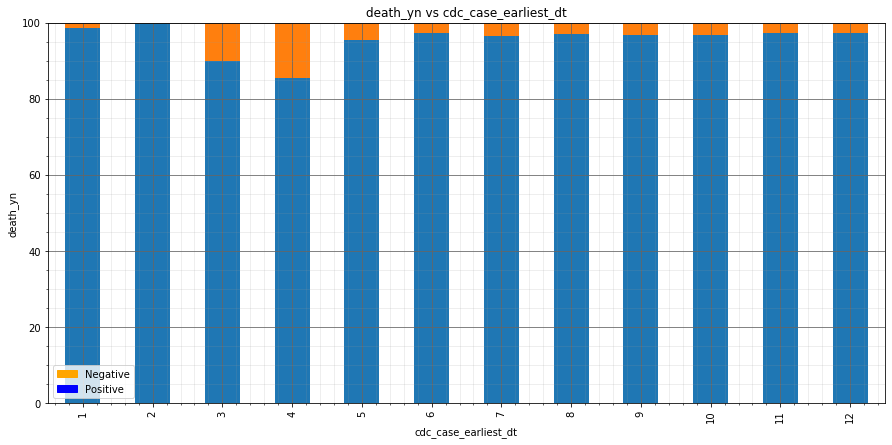

In [84]:
#Using code from the module lab
import matplotlib.patches as mpatches
cdc_case_earliest_dt = pd.unique(df["cdc_case_earliest_dt"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("cdc_case_earliest_dt")
print("Index \t Count")

# for each delinquency category
for i in cdc_case_earliest_dt:
    
    count = df[df["cdc_case_earliest_dt"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['cdc_case_earliest_dt'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','cdc_case_earliest_dt','death_yn']].groupby(['cdc_case_earliest_dt','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs cdc_case_earliest_dt", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("cdc_case_earliest_dt")
my_plot.set_ylabel("death_yn")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for the earlier of the clinical date against the death status. 

- Negative outcome tends to concentrate in March and April in a year, around 10 ~ 15 %.
- Between May and December, the negative outcome is around 5%
- Overall, this doesn't tell us much information since the difference is relativaly low, and the earlier of the clinical date thus seems not a good marker for predicting the outcome.

pos_spec_dt
Index 	 Count
nan 	 0
10.0 	 271
8.0 	 209
9.0 	 193
3.0 	 77
5.0 	 168
12.0 	 482
11.0 	 483
1.0 	 252
6.0 	 182
7.0 	 262
4.0 	 191


(0, 100)

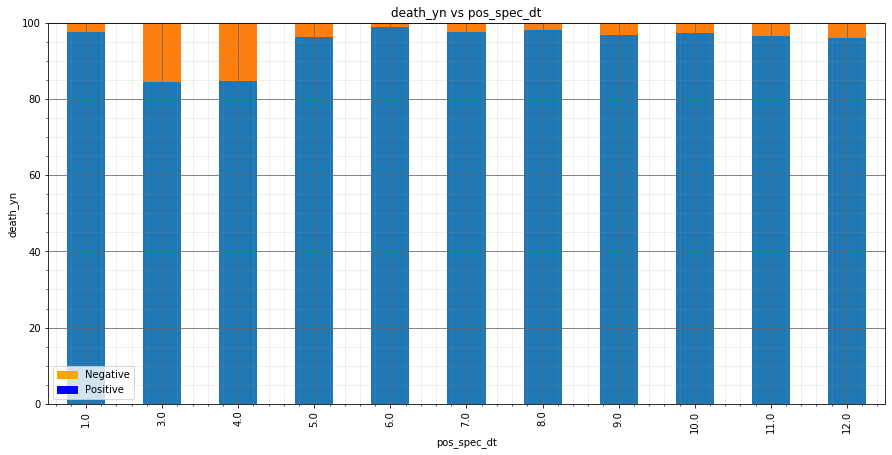

In [85]:
#Using code from the module lab
import matplotlib.patches as mpatches
pos_spec_dt = pd.unique(df["pos_spec_dt"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("pos_spec_dt")
print("Index \t Count")

# for each delinquency category
for i in pos_spec_dt:
    
    count = df[df["pos_spec_dt"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['pos_spec_dt'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','pos_spec_dt','death_yn']].groupby(['pos_spec_dt','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs pos_spec_dt", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("pos_spec_dt")
my_plot.set_ylabel("death_yn")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Date of first positive specimen collection against the death status. 

- Negative outcome tends to concentrate in March and April in a year, around 15 %.
- Between May and December, the negative outcome is around 5%
- Overall, this doesn't tell us much information since the difference is relativaly low, and symptom onset date thus seems not a good marker for predicting the outcome.

onset_dt
Index 	 Count
nan 	 0
10.0 	 530
9.0 	 350
12.0 	 928
3.0 	 179
4.0 	 258
11.0 	 997
1.0 	 347
7.0 	 506
8.0 	 358
5.0 	 206
6.0 	 358
2.0 	 2


(0, 100)

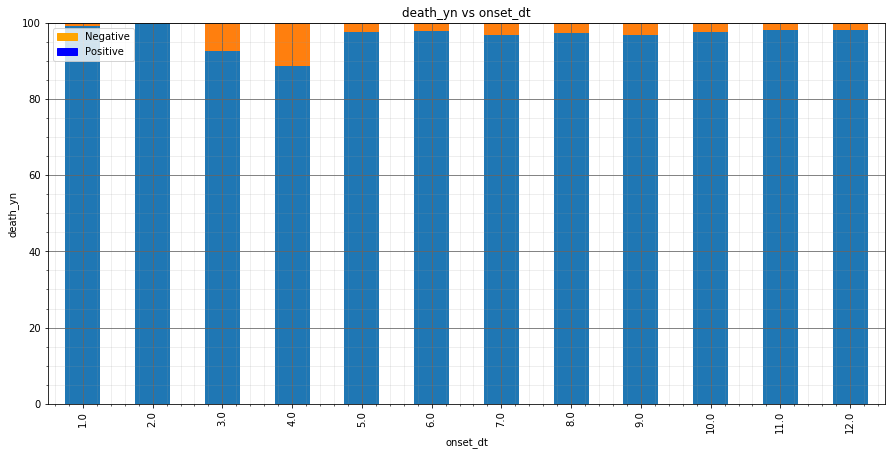

In [86]:
#Using code from the module lab
import matplotlib.patches as mpatches
onset_dt = pd.unique(df["onset_dt"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("onset_dt")
print("Index \t Count")

# for each delinquency category
for i in onset_dt:
    
    count = df[df["onset_dt"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['onset_dt'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','onset_dt','death_yn']].groupby(['onset_dt','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs onset_dt", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("onset_dt")
my_plot.set_ylabel("death_yn")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for symptom onset date against the death status. 

- Negative outcome tends to concentrate in March and April in a year, around 10 ~ 15 %.
- Between May and December, the negative outcome is around 5%
- Overall, this doesn't tell us much information since the difference is relativaly low, and symptom onset date thus seems not a good marker for predicting the outcome.

sex
Index 	 Count
Male 	 4377
Female 	 5046
Unknown 	 66
nan 	 0


(0, 100)

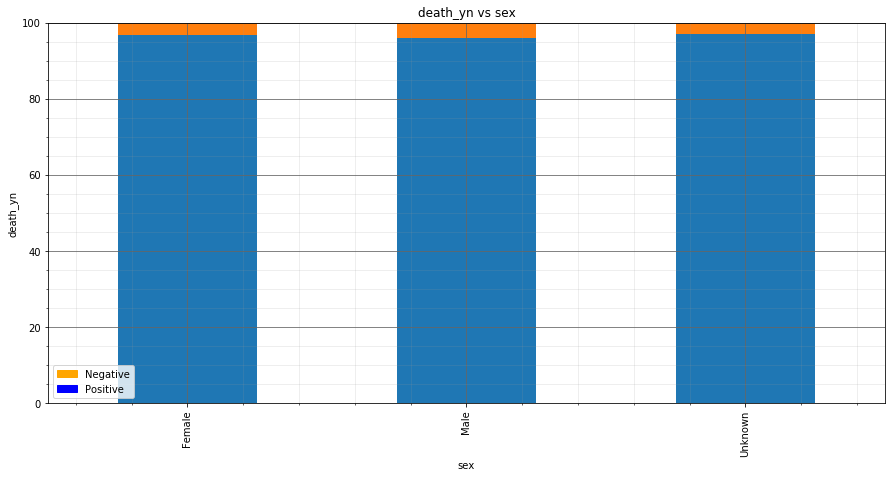

In [88]:
#Using code from the module lab
import matplotlib.patches as mpatches
sex = pd.unique(df["sex"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("sex")
print("Index \t Count")

# for each delinquency category
for i in sex:
    
    count = df[df["sex"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['sex'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','sex','death_yn']].groupby(['sex','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs sex", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("sex")
my_plot.set_ylabel("death_yn")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for sex upon outcome against the death status.

- In general, ~5% among all sex is vulnerable to negative outcome. 

- Overall, this doesn't tell us much information since the difference is relativaly low, and symptom onset date thus seems not a good marker for predicting the outcome.

age_group
Index 	 Count
20 - 29 Years 	 1778
0 - 9 Years 	 453
30 - 39 Years 	 1489
50 - 59 Years 	 1290
70 - 79 Years 	 568
10 - 19 Years 	 1015
60 - 69 Years 	 1023
40 - 49 Years 	 1378
80+ Years 	 497
nan 	 0


(0, 100)

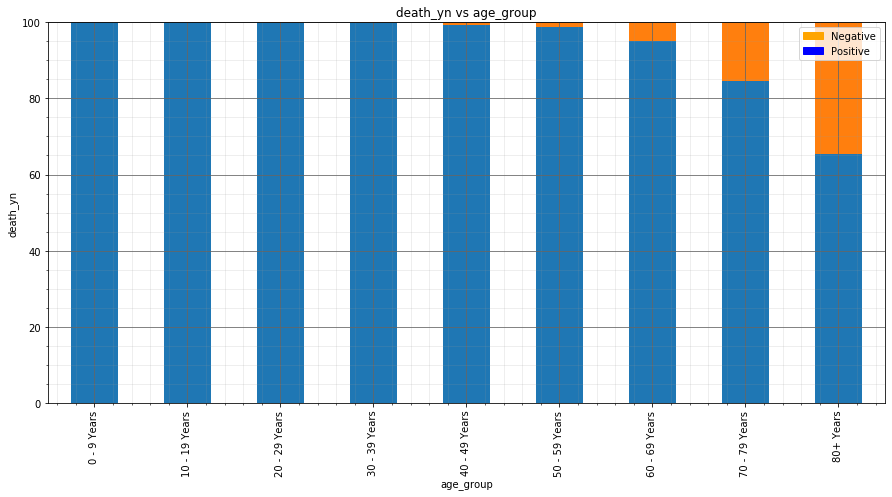

In [89]:
#Using code from the module lab
import matplotlib.patches as mpatches
age_group = pd.unique(df["age_group"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("age_group")
print("Index \t Count")

# for each delinquency category
for i in age_group:
    
    count = df[df["age_group"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['age_group'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','age_group','death_yn']].groupby(['age_group','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs age_group", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("age_group")
my_plot.set_ylabel("death_yn")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for age group upon outcome against the death status. 

- In general, over 80+ have higher negative death rate among all other age groups, 70-79 years have approx 10-15% of negative outcome rate, and 60-69 years have approx 5% of negative outcome rate.
- Approx 35% of over 80+ have negative outcome, a relatively large percentage.
- 40 - 49 years and 50 - 59 years have around 1 - 2 % of negative outcome rate.
- All other age groups less than 40 years have no death rate. 
- We could thus derive a new feature that have three categories, the young, middle age and elderly, without losing much information.
- Age group is a potential candidate for a predicting death status.

race_ethnicity_combined
Index 	 Count
nan 	 0
Multiple/Other, Non-Hispanic 	 490
White, Non-Hispanic 	 3290
Hispanic/Latino 	 975
Black, Non-Hispanic 	 698
Asian, Non-Hispanic 	 229
American Indian/Alaska Native, Non-Hispanic 	 61
Native Hawaiian/Other Pacific Islander, Non-Hispanic 	 20


(0, 100)

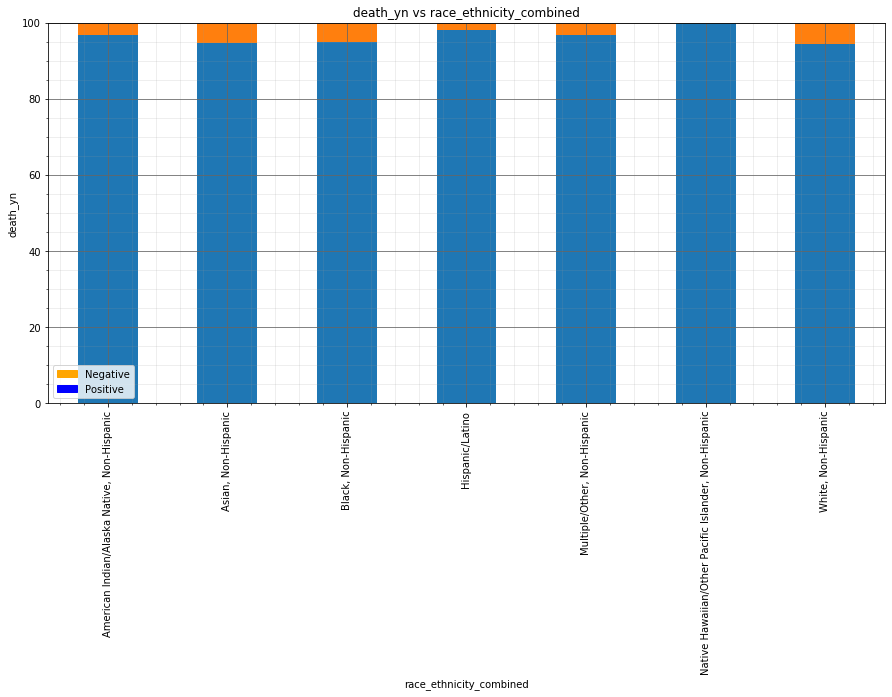

In [90]:
#Using code from the module lab
import matplotlib.patches as mpatches
race_ethnicity_combined = pd.unique(df["race_ethnicity_combined"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("race_ethnicity_combined")
print("Index \t Count")

# for each delinquency category
for i in race_ethnicity_combined:
    
    count = df[df["race_ethnicity_combined"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['race_ethnicity_combined'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','race_ethnicity_combined','death_yn']].groupby(['race_ethnicity_combined','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs race_ethnicity_combined", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("race_ethnicity_combined")
my_plot.set_ylabel("death_yn")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for symptom onset date against the death status. 

- Negative outcome tends to concentrate in Asian,Non-Hispanic , Black/Non-Hispanic and White/Hispanic, around 5%.
- a slightly less negative outcome concentrate in American Indian/Alaska, Non-Hispanic, Hispanic/Latino, Multiple/Other, Non-Hispanic, approx 2%
- Overall, this doesn't tell us much information since the difference is relativaly low, and race_ethnicity_combined thus seems not a good marker for predicting the outcome.

hosp_yn
Index 	 Count
nan 	 0
No 	 5220
Yes 	 669
OTH 	 1


(0, 100)

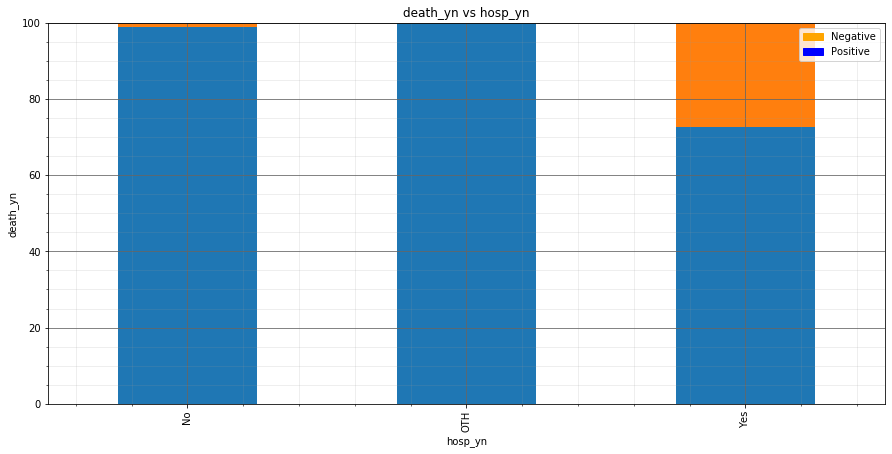

In [91]:
#Using code from the module lab
import matplotlib.patches as mpatches
hosp_yn = pd.unique(df["hosp_yn"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("hosp_yn")
print("Index \t Count")

# for each delinquency category
for i in hosp_yn:
    
    count = df[df["hosp_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['hosp_yn'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','hosp_yn','death_yn']].groupby(['hosp_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs hosp_yn", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("hosp_yn")
my_plot.set_ylabel("death_yn")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for symptom onset date against the death status. 

- Negative outcome tends to concentrate in those admitted to hospitals, approx 30%
- a comparatively less negative outcome goes to those who didnt admit to hospitals. 
- Overall, it is an good indicator that predicting the outcome. 

icu_yn
Index 	 Count
nan 	 0
No 	 968
Yes 	 82


(0, 100)

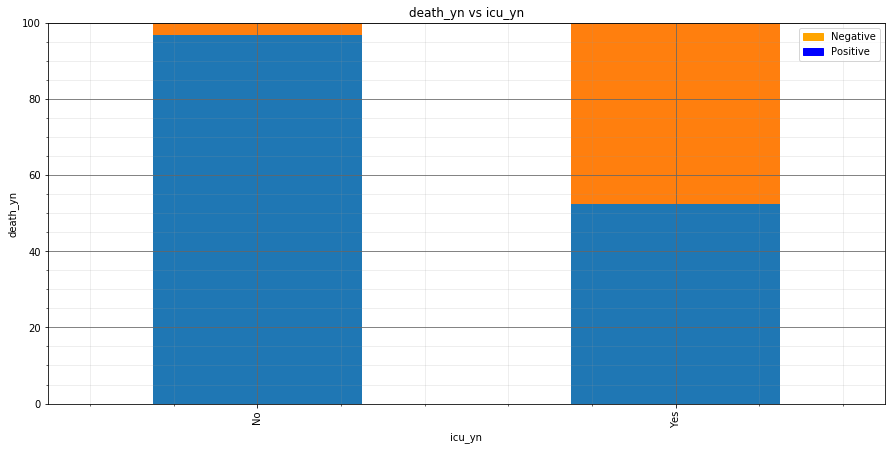

In [92]:
#Using code from the module lab
import matplotlib.patches as mpatches
icu_yn = pd.unique(df["icu_yn"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("icu_yn")
print("Index \t Count")

# for each delinquency category
for i in icu_yn:
    
    count = df[df["icu_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['icu_yn'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','icu_yn','death_yn']].groupby(['icu_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs icu_yn", figsize=(15,7), grid=True)

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("icu_yn")
my_plot.set_ylabel("death_yn")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for ICU admission status against the death status.

Negative outcome tends to concentrate in those admitted to ICU, approx 50%
a comparatively less negative outcome goes to those who didnt admit to ICU.
Overall, it is an good indicator that predicting the outcome.

- Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome (i.e., churn)? Explain in plain words (a short paragraph) the story of your findings so far.

- Categorical vs Categorical

   - In general the subset we picked do have a relatively strong connection with the death status, i.e., they are good markers to predict the outcome.
   
   - For cdc_case_earliest_dt, negative outcome tends to concentrate in March and April in a year, around 10 ~ 15 %.
   - For pos_spec_dt, negative outcome tends to concentrate in March and April in a year, around 15 %
   - For onset_dt, negative outcome tends to concentrate in March and April in a year, around 10 ~ 15 %
   - We see case reported in March, April. Spring tends to have a higher percentage of death rate even Winter has the largest reported case, the death status is not concentrate in Winter. 
   - Negative outcome tends to concentrate in those admitted to hospitals, approx 30%
   - In general, ~5% among all sex is vulnerable to negative outcome.
   - In general, over 80+ have higher negative death rate among all other age groups, 70-79 years have approx 10-15% of negative outcome rate, and 60-69 years have approx 5% of negative outcome rate.
   - We see a significant drop in the likelihood of a positive outcome if the reported case age is smaller. 
   - Negative outcome tends to concentrate in those admitted to ICU, approx 50% a comparatively less negative outcome goes to those who didnt admit to ICU.
   - Negative outcome tends to concentrate in Asian,Non-Hispanic , Black/Non-Hispanic and White/Hispanic, around 5%.
   - a slightly less negative outcome concentrate in American Indian/Alaska, Non-Hispanic, Hispanic/Latino, Multiple/Other, Non-Hispanic, approx 2%
   - We see that non-hispanic has the largest reported cases and also the corresponding deah rate.

# (4). Transform, extend or combine the existing features to create a few new features (at least 3)

### Aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

#### **New feature 1** 
- Age Category: Measures if a specific age categroy is more vulnerable to death.
- From analysis of the data if the younger the age group, the rate of death rate is less. The range of age groups is not that important
- Therefore it makes sense to derive a feature with a age category group, kids to young adults, middle aged and the elderly. 

In [93]:
#copy the values in 'age_group' to a new column 'age_category'
df['age_category'] = df["age_group"]

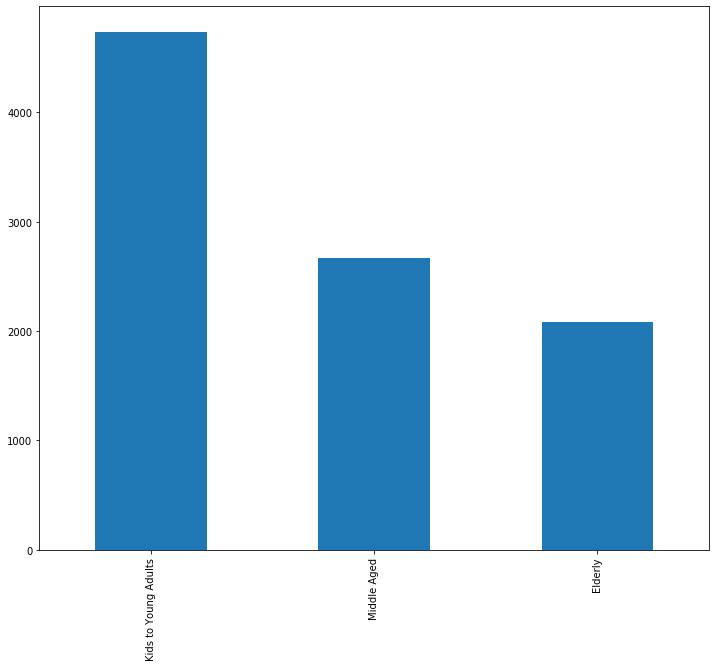

In [94]:
df["age_category"]=df["age_category"].astype('object') # cast it to 'object' first to avoid ValueError: Cannot setitem on a Categorical with a new category, set the categories first

for row_index in range(len(df["age_category"])): #for each row index of length of column "Health_condition"
    column_index=df.columns.get_loc("age_category") #get column index
    health_condition=df.iat[row_index, column_index] #get content of the cell based on row and column index
#     print(health_condition)
    if (isinstance(health_condition, str)):
        if "60 - 69 Years" in health_condition or "70 - 79 Years" in health_condition or "80+ Years" in health_condition:
            df.iloc[[row_index], [column_index]]=('Elderly') 
        elif '40' in health_condition or '50' in health_condition:
            df.iloc[[row_index], [column_index]]=('Middle Aged') 
        else:
            df.iloc[[row_index], [column_index]]=('Kids to Young Adults') 

df['age_category'] = df['age_category'].astype('category') #convert it back to 'category'
df['age_category'].value_counts().plot(kind='bar', figsize=(12,10))

Generate stacked bar plot 

age_category
Index 	 Count
Kids to Young Adults 	 4735
Middle Aged 	 2668
Elderly 	 2088
nan 	 0


(0, 100)

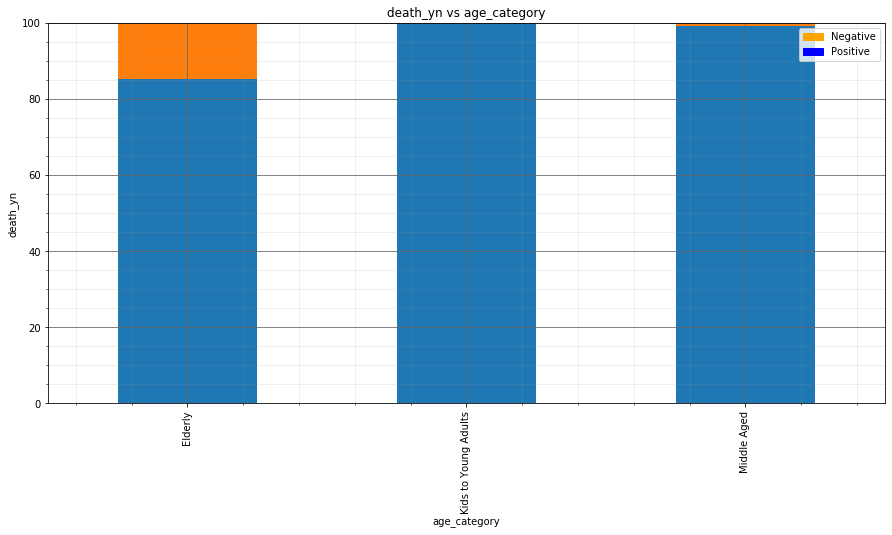

In [95]:
#Using code from the module lab
age_category = pd.unique(df['age_category'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('age_category')
print("Index \t Count")

# for each age category
for i in age_category:
    
    count = df[df['age_category'] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['age_category'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','age_category','death_yn']].groupby(['age_category','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs age_category", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("age_category")
my_plot.set_ylabel("death_yn")
my_plot.set_ylim([0,100])

#### **New feature 2** 

- Ethnicity: Measures if a reported case is hispanic or non-hispanic
- From analysis of the data, non-hispanic has a higher percentage of death rate while hispanic has slightly less rate of death.
- Therefore it is makes sense to transform the 'race_ethnicity_combined' to a feature with binary outcome: Hispanic and Non-hispanic. 

In [96]:
#copy the values in 'race_ethnicity_combined' to a new column 'age_category'
df['ethnicity'] = df["race_ethnicity_combined"]

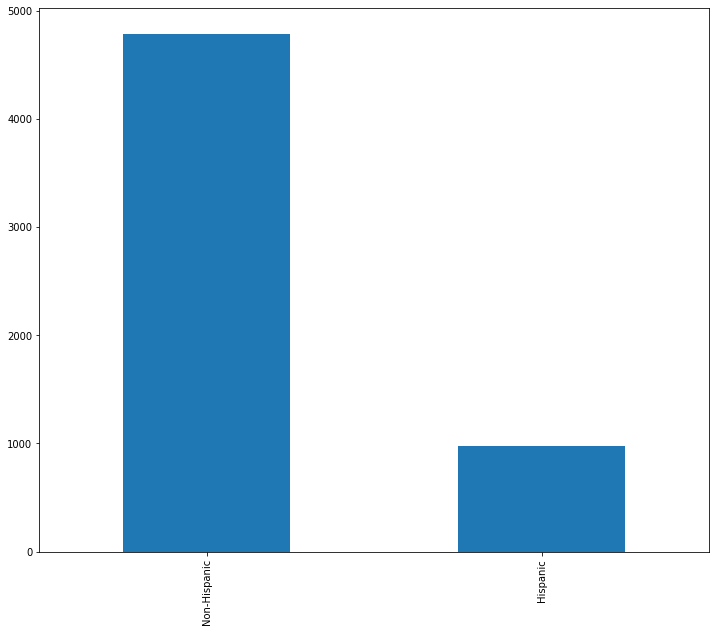

In [97]:
df["ethnicity"]=df["ethnicity"].astype('object') # cast it to 'object' first to avoid ValueError: Cannot setitem on a Categorical with a new category, set the categories first

for row_index in range(len(df["ethnicity"])): #for each row index of length of column "Health_condition"
    column_index=df.columns.get_loc("ethnicity") #get column index
    health_condition=df.iat[row_index, column_index] #get content of the cell based on row and column index
    if (isinstance(health_condition, str)):
        if "Non-Hispanic" in health_condition:
            df.iloc[[row_index], [column_index]]=('Non-Hispanic') 
        elif "Hispanic" in health_condition:
            df.iloc[[row_index], [column_index]]=('Hispanic') 

df['ethnicity'] = df['ethnicity'].astype('category') #convert it back to 'category'
df['ethnicity'].value_counts().plot(kind='bar', figsize=(12,10))

ethnicity
Index 	 Count
nan 	 0
Non-Hispanic 	 4788
Hispanic 	 975


(0, 100)

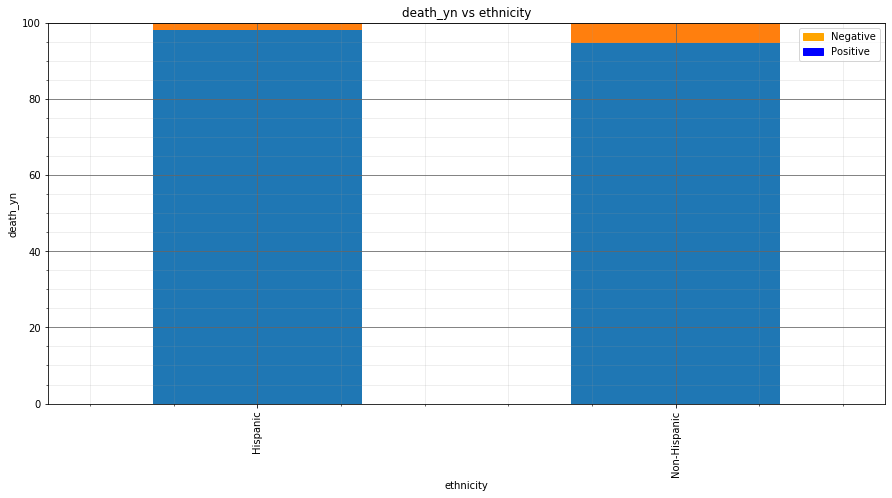

In [98]:
#Using code from the module lab
age_category = pd.unique(df['ethnicity'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('ethnicity')
print("Index \t Count")

# for each age category
for i in age_category:
    
    count = df[df['ethnicity'] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['ethnicity'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','ethnicity','death_yn']].groupby(['ethnicity','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs ethnicity", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("ethnicity")
my_plot.set_ylabel("death_yn")
my_plot.set_ylim([0,100])

New feature 3
- Seasonal variation: Measures if a reported case is common in which season.
- From analysis of the data, cases reported in March and April tends to have a higher death rate.  
- Although winter has a largest reported cases while Spring has the least. 
- When taking the death rate as target outcome, it seam cases in Spring have higher precentage of death rate. 

Therefore it is makes sense to transform the 'cdc_case_earliest_dt' to a feature with seasonal outcome: Winter, Summer, Spring and Autumn.

In [99]:
df['seasonal_variation'] = df["cdc_case_earliest_dt"]

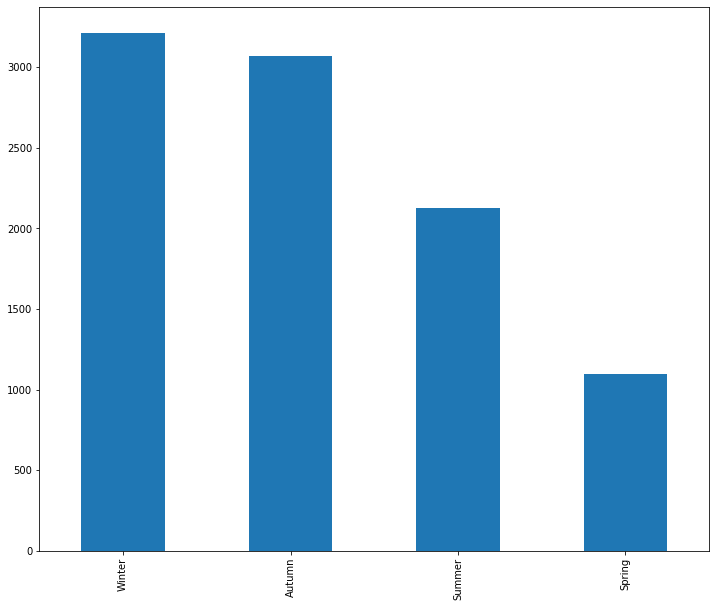

In [100]:
df["seasonal_variation"]=df["seasonal_variation"].astype('object') # cast it to 'object' first to avoid ValueError: Cannot setitem on a Categorical with a new category, set the categories first

for row_index in range(len(df["seasonal_variation"])): #for each row index of length of column "Health_condition"
    column_index=df.columns.get_loc("seasonal_variation") #get column index
    health_condition=df.iat[row_index, column_index] #get content of the cell based on row and column index
    if (isinstance(health_condition, int)):
        if health_condition == 1 or health_condition == 12 or health_condition == 2:
            df.iloc[[row_index], [column_index]]=('Winter') 
        elif health_condition == 6 or health_condition == 7 or health_condition == 8:
            df.iloc[[row_index], [column_index]]=('Summer') 
        elif health_condition == 9 or health_condition == 10 or health_condition == 11:
            df.iloc[[row_index], [column_index]]=('Autumn') 
        else:
            df.iloc[[row_index], [column_index]]=('Spring')

df['seasonal_variation'] = df['seasonal_variation'].astype('category') #convert it back to 'category'
df['seasonal_variation'].value_counts().plot(kind='bar', figsize=(12,10))

seasonal_variation
Index 	 Count
Autumn 	 3067
Winter 	 3213
Summer 	 2126
Spring 	 1098


(0, 100)

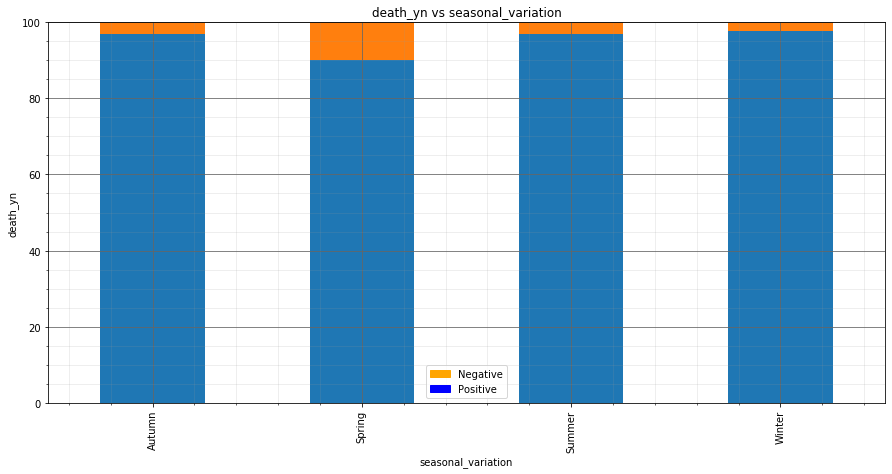

In [101]:
#Using code from the module lab
age_category = pd.unique(df['seasonal_variation'].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print('seasonal_variation')
print("Index \t Count")

# for each age category
for i in age_category:
    
    count = df[df['seasonal_variation'] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
    
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['seasonal_variation'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','seasonal_variation','death_yn']].groupby(['seasonal_variation','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="death_yn vs seasonal_variation", figsize=(15,7))

# add legend
red_patch = mpatches.Patch(color='orange', label='Negative')
blue_patch = mpatches.Patch(color='blue', label='Positive')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

# set labels
my_plot.set_xlabel("seasonal_variation")
my_plot.set_ylabel("death_yn")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for the new feature 'seasonal_variation' against the target death status.

- There is approx 10% likelihood of negative outcomes if cases reported in Spring.

- Other seasons have around the same death rate ~5%. 

- Overll, the new feature seasonal variation is a good indicater of predicting the death rate.

### To finish - Print data types, descriptive tables, save to csv

In [102]:
df.dtypes

cdc_case_earliest_dt       category
pos_spec_dt                category
onset_dt                   category
current_status             category
sex                        category
age_group                  category
race_ethnicity_combined    category
hosp_yn                    category
icu_yn                     category
death_yn                   category
percent                     float64
age_category               category
ethnicity                  category
seasonal_variation         category
dtype: object

In [103]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
cdc_case_earliest_dt,9504,12,12,2177
pos_spec_dt,2770,11,11,483
onset_dt,5019,12,11,997
current_status,9504,2,Laboratory-confirmed case,8858
sex,9489,3,Female,5046
age_group,9491,9,20 - 29 Years,1778
race_ethnicity_combined,5763,7,"White, Non-Hispanic",3290
hosp_yn,5890,3,No,5220
icu_yn,1050,2,No,968
death_yn,9504,2,No,9165


In [104]:
# Write the cleaned dataframe to a csv file
df.to_csv('covid19_cdc_1-3_cleaned_new_features.csv', index=False)